In [1]:
sc

from pyspark.sql import SQLContext,Row
from pyspark import SparkConf,SparkContext

rdd=sc.textFile("file:///home/cloudera/Downloads/house_prices_advanced_regression/train.csv")   



In [32]:
rdd.take(1)

[u'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice']

In [51]:
def func(line):
    l1=line.split(",")
    return Row(Id=l1[0],MSSubClass=l1[1],MSZoning=l1[2],LotFrontage=l1[3],
               LotArea=l1[4],Street=l1[5],Alley=l1[6],
               LotShape=l1[7],LandContour=l1[8],Utilities=l1[9],LotConfig=l1[10],
               LandSlope=l1[11],Neighborhood=l1[12],Condition1=l1[13],Condition2=l1[14],BldgType=l1[15],
               HouseStyle=l1[16],OverallQual=l1[17],OverallCond=l1[18],YearBuilt=l1[19],YearRemodAdd=l1[20],
               RoofStyle=l1[21],RoofMatl=l1[22],Exterior1st=l1[23],Exterior2nd=l1[24],MasVnrType=l1[25],
               MasVnrArea=l1[26],ExterQual=l1[27],ExterCond=l1[28],Foundation=l1[29],BsmtQual=l1[30],
               BsmtCond=l1[31],BsmtExposure=l1[32],BsmtFinType1=l1[33],BsmtFinSF1=l1[34],BsmtFinType2=l1[35],
               BsmtFinSF2=l1[36],BsmtUnfSF=l1[37],TotalBsmtSF=l1[38],Heating=l1[39],HeatingQC=l1[40],
               CentralAir=l1[41],Electrical=l1[42],firstFlrSF=l1[43],secondFlrSF=l1[44],LowQualFinSF=l1[45],
               GrLivArea=l1[46],BsmtFullBath=l1[47],BsmtHalfBath=l1[48],FullBath=l1[49],
               HalfBath=l1[50],BedroomAbvGr=l1[51],KitchenAbvGr=l1[52],KitchenQual=l1[53],
               TotRmsAbvGrd=l1[54],Functional=l1[55],Fireplaces=l1[56],
               FireplaceQu=l1[57],GarageType=l1[58],GarageYrBlt=l1[59],GarageFinish=l1[60],
               GarageCars=l1[61],GarageArea=l1[62],GarageQual=l1[63],GarageCond=l1[64],PavedDrive=l1[65],
               WoodDeckSF=l1[66],OpenPorchSF=l1[67],EnclosedPorch=l1[68],threeSsnPorch=l1[69],
               ScreenPorch=l1[70],PoolArea=l1[71],PoolQC=l1[72],Fence=l1[73],MiscFeature=l1[74],
               MiscVal=l1[75],MoSold=l1[76],YrSold=l1[77],SaleType=l1[78],SaleCondition=l1[79],SalePrice=l1[80])
 

In [52]:
res=rdd.map(func)

In [53]:
res.take(1)

[Row(Alley=u'Alley', BedroomAbvGr=u'BedroomAbvGr', BldgType=u'BldgType', BsmtCond=u'BsmtCond', BsmtExposure=u'BsmtExposure', BsmtFinSF1=u'BsmtFinSF1', BsmtFinSF2=u'BsmtFinSF2', BsmtFinType1=u'BsmtFinType1', BsmtFinType2=u'BsmtFinType2', BsmtFullBath=u'BsmtFullBath', BsmtHalfBath=u'BsmtHalfBath', BsmtQual=u'BsmtQual', BsmtUnfSF=u'BsmtUnfSF', CentralAir=u'CentralAir', Condition1=u'Condition1', Condition2=u'Condition2', Electrical=u'Electrical', EnclosedPorch=u'EnclosedPorch', ExterCond=u'ExterCond', ExterQual=u'ExterQual', Exterior1st=u'Exterior1st', Exterior2nd=u'Exterior2nd', Fence=u'Fence', FireplaceQu=u'FireplaceQu', Fireplaces=u'Fireplaces', Foundation=u'Foundation', FullBath=u'FullBath', Functional=u'Functional', GarageArea=u'GarageArea', GarageCars=u'GarageCars', GarageCond=u'GarageCond', GarageFinish=u'GarageFinish', GarageQual=u'GarageQual', GarageType=u'GarageType', GarageYrBlt=u'GarageYrBlt', GrLivArea=u'GrLivArea', HalfBath=u'HalfBath', Heating=u'Heating', HeatingQC=u'Heating

In [54]:
sqlcontext=SQLContext(sc)

In [55]:
temp=sqlcontext.createDataFrame(res)

In [56]:
temp.registerTempTable("temp_table")

In [57]:
sqlcontext.sql("select * from temp_table")

DataFrame[Alley: string, BedroomAbvGr: string, BldgType: string, BsmtCond: string, BsmtExposure: string, BsmtFinSF1: string, BsmtFinSF2: string, BsmtFinType1: string, BsmtFinType2: string, BsmtFullBath: string, BsmtHalfBath: string, BsmtQual: string, BsmtUnfSF: string, CentralAir: string, Condition1: string, Condition2: string, Electrical: string, EnclosedPorch: string, ExterCond: string, ExterQual: string, Exterior1st: string, Exterior2nd: string, Fence: string, FireplaceQu: string, Fireplaces: string, Foundation: string, FullBath: string, Functional: string, GarageArea: string, GarageCars: string, GarageCond: string, GarageFinish: string, GarageQual: string, GarageType: string, GarageYrBlt: string, GrLivArea: string, HalfBath: string, Heating: string, HeatingQC: string, HouseStyle: string, Id: string, KitchenAbvGr: string, KitchenQual: string, LandContour: string, LandSlope: string, LotArea: string, LotConfig: string, LotFrontage: string, LotShape: string, LowQualFinSF: string, MSSub

In [58]:
df=temp.toPandas()

In [59]:
df['BedroomAbvGr'].unique()

array([u'BedroomAbvGr', u'3', u'4', u'1', u'2', u'0', u'5', u'6', u'8'], dtype=object)

In [65]:
df=df.iloc[1:,:]

In [69]:
df.head()

,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,...,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,firstFlrSF,secondFlrSF,threeSsnPorch
1,NA,3,1Fam,TA,No,706,0,GLQ,Unf,1,...,8,856,AllPub,0,2003,2003,2008,856,854,0
2,NA,3,1Fam,TA,Gd,978,0,ALQ,Unf,0,...,6,1262,AllPub,298,1976,1976,2007,1262,0,0
3,NA,3,1Fam,TA,Mn,486,0,GLQ,Unf,1,...,6,920,AllPub,0,2001,2002,2008,920,866,0
4,NA,3,1Fam,Gd,No,216,0,ALQ,Unf,1,...,7,756,AllPub,0,1915,1970,2006,961,756,0
5,NA,4,1Fam,TA,Av,655,0,GLQ,Unf,1,...,9,1145,AllPub,192,2000,2000,2008,1145,1053,0


In [79]:
df.iloc[1,70:]

Street             Pave
TotRmsAbvGrd          6
TotalBsmtSF        1262
Utilities        AllPub
WoodDeckSF          298
YearBuilt          1976
YearRemodAdd       1976
YrSold             2007
firstFlrSF         1262
secondFlrSF           0
threeSsnPorch         0
Name: 2, dtype: object

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 1 to 1460
Data columns (total 81 columns):
Alley            1460 non-null object
BedroomAbvGr     1460 non-null object
BldgType         1460 non-null object
BsmtCond         1460 non-null object
BsmtExposure     1460 non-null object
BsmtFinSF1       1460 non-null object
BsmtFinSF2       1460 non-null object
BsmtFinType1     1460 non-null object
BsmtFinType2     1460 non-null object
BsmtFullBath     1460 non-null object
BsmtHalfBath     1460 non-null object
BsmtQual         1460 non-null object
BsmtUnfSF        1460 non-null object
CentralAir       1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
Electrical       1460 non-null object
EnclosedPorch    1460 non-null object
ExterCond        1460 non-null object
ExterQual        1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
Fence            1460 non-null object
FireplaceQu      14

In [71]:
#int columns:
#BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,firstFlrSF,secondFlrSF,threeSsnPorch

array([u'NA', u'Grvl', u'Pave'], dtype=object)

In [126]:
df[['BedroomAbvGr','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath','BsmtUnfSF','EnclosedPorch','Fireplaces','FullBath','GarageArea','GarageCars','GrLivArea','HalfBath','Id','KitchenAbvGr','LotArea','LowQualFinSF','MSSubClass','MiscVal','MoSold','OpenPorchSF','OverallCond','OverallQual','PoolArea','SalePrice','ScreenPorch','TotRmsAbvGrd','TotalBsmtSF','WoodDeckSF','firstFlrSF','secondFlrSF','threeSsnPorch']]=df[['BedroomAbvGr','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath','BsmtUnfSF','EnclosedPorch','Fireplaces','FullBath','GarageArea','GarageCars','GrLivArea','HalfBath','Id','KitchenAbvGr','LotArea','LowQualFinSF','MSSubClass','MiscVal','MoSold','OpenPorchSF','OverallCond','OverallQual','PoolArea','SalePrice','ScreenPorch','TotRmsAbvGrd','TotalBsmtSF','WoodDeckSF','firstFlrSF','secondFlrSF','threeSsnPorch']].astype('int')

In [129]:
df['MasVnrArea'].unique()

array([u'196', u'0', u'162', u'350', u'186', u'240', u'286', u'306',
       u'212', u'180', u'380', u'281', u'640', u'200', u'246', u'132',
       u'650', u'101', u'412', u'272', u'456', u'1031', u'178', u'573',
       u'344', u'287', u'167', u'1115', u'40', u'104', u'576', u'443',
       u'468', u'66', u'22', u'284', u'76', u'203', u'68', u'183', u'48',
       u'28', u'336', u'600', u'768', u'480', u'220', u'184', u'1129',
       u'116', u'135', u'266', u'85', u'309', u'136', u'288', u'70',
       u'320', u'50', u'120', u'436', u'252', u'84', u'664', u'226',
       u'300', u'653', u'112', u'491', u'268', u'748', u'98', u'275',
       u'138', u'205', u'262', u'128', u'260', u'153', u'64', u'312',
       u'16', u'922', u'142', u'290', u'127', u'506', u'297', u'NA',
       u'604', u'254', u'36', u'102', u'472', u'481', u'108', u'302',
       u'172', u'399', u'270', u'46', u'210', u'174', u'348', u'315',
       u'299', u'340', u'166', u'72', u'31', u'34', u'238', u'1600',
       u'365', u

In [207]:
l=[]
for i in range(0,len(df.columns)):
    if 'NA' in df[df.columns[i]].unique():
        l.append(df.columns[i])
    else:
        continue

/home/cloudera/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  app.launch_new_instance()


In [208]:
import numpy as np

In [210]:
#df.Alley.value_counts()

In [211]:
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64

In [212]:
df['BsmtFinSF1']=df['BsmtFinSF1'].replace('NA',0)

In [213]:
df['BsmtFinSF2']=df['BsmtFinSF2'].replace('NA',0)

In [183]:
df.drop('Alley',axis=1,inplace=True)

In [215]:
df.shape

(1460, 80)

In [216]:
import matplotlib.pyplot as plt

In [224]:
#df['BsmtFinSF1'].hist()
#plt.figure(figsize=(15,10))

df.hist(figsize=(20,12))
#plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe145ce56d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe13ef2a090>]], dtype=object)

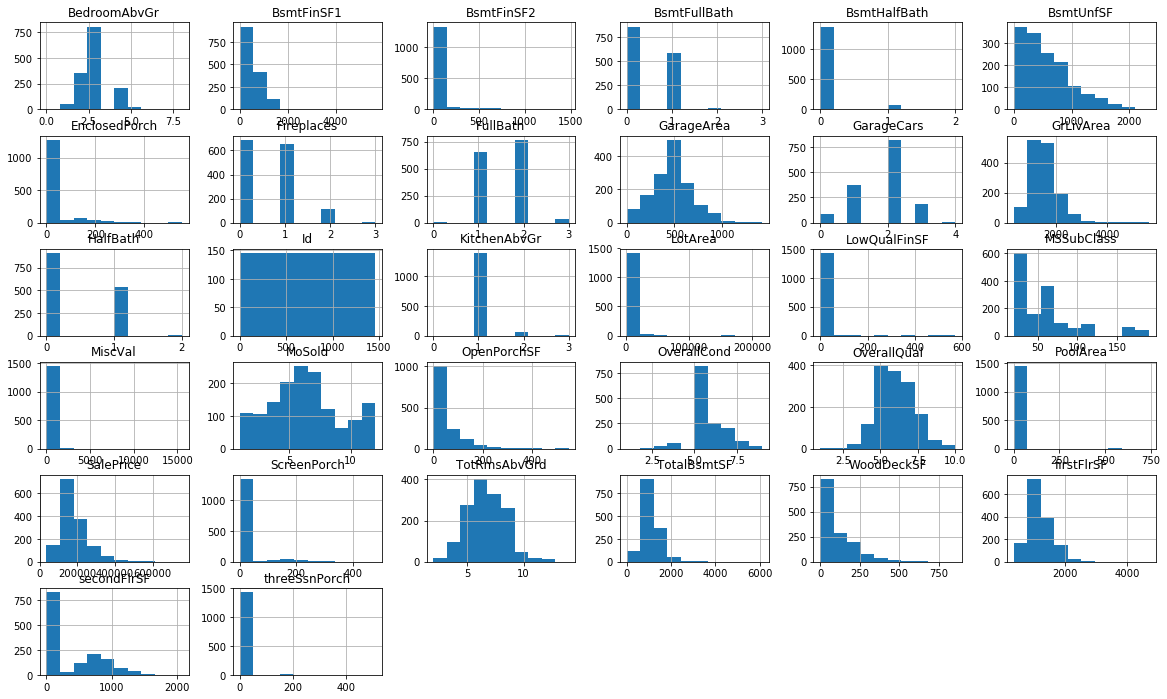

In [225]:
plt.show()